In [319]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.utils import shuffle
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [342]:
from yfinance import Share

ImportError: cannot import name 'Share' from 'yfinance' (c:\Users\jessi\anaconda3\envs\use_this_env\Lib\site-packages\yfinance\__init__.py)

In [320]:
series = yf.Ticker("SI=F")
# prices = series.history(start='2021-01-01', end='2022-01-01').Close
prices = series.history(start='2019-06-15', end='2024-06-15').Close
returns = prices.pct_change().dropna()

In [321]:
prices_latest = series.history(start='2019-06-15', end='2024-06-18').Close
returns_latest = prices_latest.pct_change().dropna()

In [322]:
print(returns)

Date
2019-06-18 00:00:00-04:00    0.011206
2019-06-19 00:00:00-04:00   -0.002336
2019-06-20 00:00:00-04:00    0.035062
2019-06-21 00:00:00-04:00   -0.012671
2019-06-24 00:00:00-04:00    0.006220
                               ...   
2024-06-10 00:00:00-04:00    0.014795
2024-06-11 00:00:00-04:00   -0.021364
2024-06-12 00:00:00-04:00    0.035801
2024-06-13 00:00:00-04:00   -0.039303
2024-06-14 00:00:00-04:00    0.014212
Name: Close, Length: 1258, dtype: float64


In [323]:
print(prices)

Date
2019-06-17 00:00:00-04:00    14.814000
2019-06-18 00:00:00-04:00    14.980000
2019-06-19 00:00:00-04:00    14.945000
2019-06-20 00:00:00-04:00    15.469000
2019-06-21 00:00:00-04:00    15.273000
                               ...    
2024-06-10 00:00:00-04:00    29.768999
2024-06-11 00:00:00-04:00    29.132999
2024-06-12 00:00:00-04:00    30.176001
2024-06-13 00:00:00-04:00    28.990000
2024-06-14 00:00:00-04:00    29.402000
Name: Close, Length: 1259, dtype: float64


Text(0, 0.5, 'Prices')

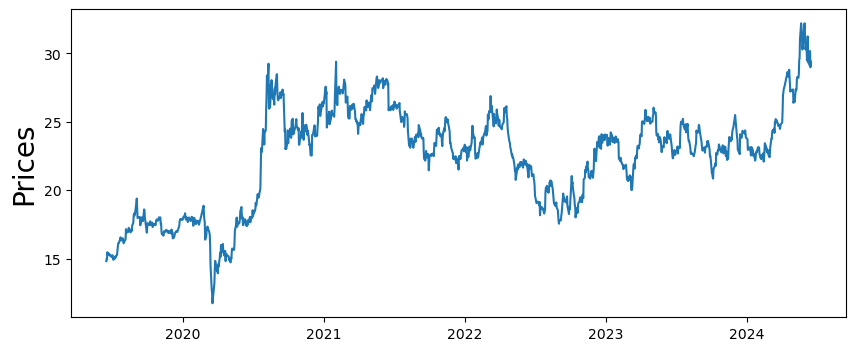

In [324]:
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Prices', fontsize=20)

Text(0, 0.5, 'Returns')

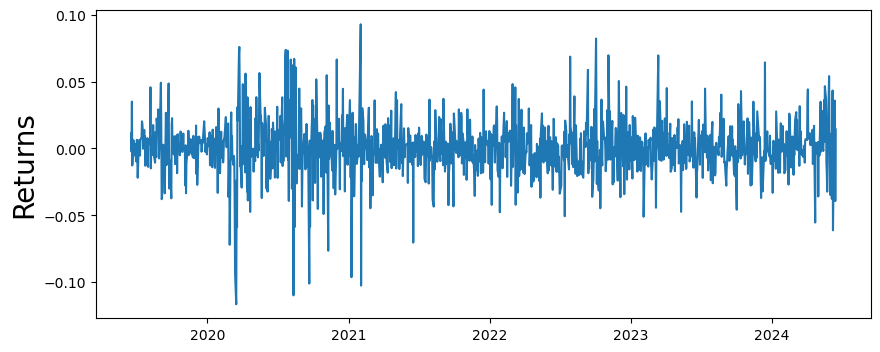

In [325]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Returns', fontsize=20)

In [326]:
WINDOW_SIZE = 10
X_train = []
y_train = []

for i in range(len(returns) - WINDOW_SIZE):
    input_window = returns.iloc[i : i + WINDOW_SIZE]
    next_return = returns.iloc[i + WINDOW_SIZE]
    
    X_train.append(input_window)
    y_train.append(next_return)
    
    # print(next_return)
    # print(input_window)

In [327]:
print(len(returns))

1258


In [328]:
print(X_train[-1])

Date
2024-05-31 00:00:00-04:00   -0.034758
2024-06-03 00:00:00-04:00    0.011354
2024-06-04 00:00:00-04:00   -0.037629
2024-06-05 00:00:00-04:00    0.015600
2024-06-06 00:00:00-04:00    0.043375
2024-06-07 00:00:00-04:00   -0.061190
2024-06-10 00:00:00-04:00    0.014795
2024-06-11 00:00:00-04:00   -0.021364
2024-06-12 00:00:00-04:00    0.035801
2024-06-13 00:00:00-04:00   -0.039303
Name: Close, dtype: float64


In [329]:
print(y_train[-1])

0.014211819916549073


In [330]:
X_test = returns.iloc[len(returns)-WINDOW_SIZE-1: len(returns)-1]
y_test = returns.iloc[len(returns)-1]

X_test_df = pd.DataFrame(X_test).T

In [331]:
print(X_test_df)

Date   2024-05-31 00:00:00-04:00  2024-06-03 00:00:00-04:00  \
Close                  -0.034758                   0.011354   

Date   2024-06-04 00:00:00-04:00  2024-06-05 00:00:00-04:00  \
Close                  -0.037629                     0.0156   

Date   2024-06-06 00:00:00-04:00  2024-06-07 00:00:00-04:00  \
Close                   0.043375                   -0.06119   

Date   2024-06-10 00:00:00-04:00  2024-06-11 00:00:00-04:00  \
Close                   0.014795                  -0.021364   

Date   2024-06-12 00:00:00-04:00  2024-06-13 00:00:00-04:00  
Close                   0.035801                  -0.039303  


In [332]:
model = XGBRegressor()
model.fit(X_train, y_train)
xgb_forest = model.predict(X_test_df)

In [333]:
print(f"Predicted return for the next time step: {xgb_forest[0]:.4f}")

Predicted return for the next time step: 0.0137


In [334]:
print(returns)

Date
2019-06-18 00:00:00-04:00    0.011206
2019-06-19 00:00:00-04:00   -0.002336
2019-06-20 00:00:00-04:00    0.035062
2019-06-21 00:00:00-04:00   -0.012671
2019-06-24 00:00:00-04:00    0.006220
                               ...   
2024-06-10 00:00:00-04:00    0.014795
2024-06-11 00:00:00-04:00   -0.021364
2024-06-12 00:00:00-04:00    0.035801
2024-06-13 00:00:00-04:00   -0.039303
2024-06-14 00:00:00-04:00    0.014212
Name: Close, Length: 1258, dtype: float64


In [335]:
print(f"Predicted return for the next time step: {xgb_forest_18[0]:.4f}")

Predicted return for the next time step: -0.0030


In [336]:
X_new = returns.iloc[-WINDOW_SIZE :]
X_new_df = pd.DataFrame(X_new).T

In [337]:
print(X_new)

Date
2024-06-03 00:00:00-04:00    0.011354
2024-06-04 00:00:00-04:00   -0.037629
2024-06-05 00:00:00-04:00    0.015600
2024-06-06 00:00:00-04:00    0.043375
2024-06-07 00:00:00-04:00   -0.061190
2024-06-10 00:00:00-04:00    0.014795
2024-06-11 00:00:00-04:00   -0.021364
2024-06-12 00:00:00-04:00    0.035801
2024-06-13 00:00:00-04:00   -0.039303
2024-06-14 00:00:00-04:00    0.014212
Name: Close, dtype: float64


In [338]:
xgb_forest_new = model.predict(X_new_df)

In [339]:
print(f"Predicted return for the next time step: {xgb_forest_new[0]:.4f}")

Predicted return for the next time step: 0.0104


In [340]:
print(returns_latest.iloc[-1])

-0.002618858009242331


In [341]:
xgb_forest_new[0] - returns_latest.iloc[-1]

0.012976394384764944